# BOOMBIKES ASSIGNMENT

**Problem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands
 - Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**Business Goal**

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## STEP 1: Reading and Understanding the data

In [1]:
# Importing Libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
# Reading the dataframe

boom_bikes = pd.read_csv('day.csv')
boom_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# checking the shape of dataframe

boom_bikes.shape

(730, 16)

In [4]:
# checking datatypes and null values of each column

boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- None of the rows or columns have any null values
- All the columns are either int or float except dteday
- Als, check for duplicate entries 
- We need to fix the column datatype of dtedate as Date

In [5]:
# dropping duplicate records and checking the shape to see if there was any duplicate record
boom_bikes.drop_duplicates(subset=None, inplace=True)
boom_bikes.shape

(730, 16)

Shape is retained, so no duplicate record

In [6]:
# converting the 'dteday' column to datetime format as per data dictionary
boom_bikes['dteday']= pd.to_datetime(boom_bikes['dteday'])

#checking datatype of dteday
print(boom_bikes.dtypes['dteday'])

datetime64[ns]


In [7]:
# fixing column names for better readability
boom_bikes = boom_bikes.rename(columns = {'yr':'year', 'mnth':'month', 'atemp':'apparent_temp', 'hum':'humidity', 'cnt':'count'}) 

In [8]:
# checking the summary statistics of numerical columns
boom_bikes.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,apparent_temp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Almost all numerical variables have similar median and mean value. Hence, no outlier treatment is required.

In [9]:
# Following categorical variables are mapped according to Data Dictionary
# season, year, month, weekday, weathersit

# Note: the date 1/1/2018 was assigned weekday as 6 which was a Monday. So, mapped accordingly 

boom_bikes['season']=boom_bikes['season'].map({1: 'spring', 2: 'summer',3:'fall', 4:'winter'})
boom_bikes['year']=boom_bikes['year'].map({0: '2018', 1: '2019'})
boom_bikes['month']=boom_bikes['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
boom_bikes['weekday']=boom_bikes['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
boom_bikes['weathersit']=boom_bikes['weathersit'].map({1: 'Clear/Partly Cloudy', 2:'Mist/Cloudy', 3:'Light Snow/Rain', 4:'Heavy Snow/Rain/Hail/Fog'})

boom_bikes.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,apparent_temp,humidity,windspeed,casual,registered,count
0,1,2018-01-01,spring,2018,Jan,0,Sat,0,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,0,Sun,0,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,0,Mon,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,0,Tue,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,0,Wed,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# As per data dictionary the target variable count is a sum of two independent variables 'casual' and 'registered'.
# So, lets validate this relationship before dropping these columns

boom_bikes['total_count'] = boom_bikes['casual'] + boom_bikes['registered']
boom_bikes[['total_count','count']].corr()

,total_count,count
total_count,1.0,1.0
count,1.0,1.0


In [11]:
# correlation being 1, dropping columns 'casual', 'registered' and 'total_count'

boom_bikes.drop(['casual','registered', 'total_count'],axis=1,inplace=True)
boom_bikes.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,apparent_temp,humidity,windspeed,count
0,1,2018-01-01,spring,2018,Jan,0,Sat,0,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-02-01,spring,2018,Jan,0,Sun,0,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-03-01,spring,2018,Jan,0,Mon,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-04-01,spring,2018,Jan,0,Tue,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-05-01,spring,2018,Jan,0,Wed,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# checking unique values against each column

boom_bikes.nunique().sort_values()

year               2
holiday            2
workingday         2
weathersit         3
season             4
weekday            7
month             12
temp             498
humidity         594
windspeed        649
apparent_temp    689
count            695
instant          730
dteday           730
dtype: int64

In [13]:
# Dropping column 'instant' as all values are unique and its most likely index value
# Also dropping 'dteday' as we already have the columns 'year' and 'month' for the same date. 
# Moreover, this data is not a time-series data. So, dropping this date column

boom_bikes.drop(['instant','dteday'],axis=1,inplace=True)
boom_bikes.shape

(730, 12)

OBSERVATION:
- Now the data is ready for visualization
- We have clearly identied both continuous and categorical variables
- Continuous variable being 'temp', 'humidity', 'windspeed', 'apparent_temp', 'count'
- Categorical variables being 'season', 'year','month', 'holiday', 'weekday', 'workingday', 'weathersit'

## STEP 2: Data Visualization

We'll visualise our data using matplotlib and seaborn.

#### 1. Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

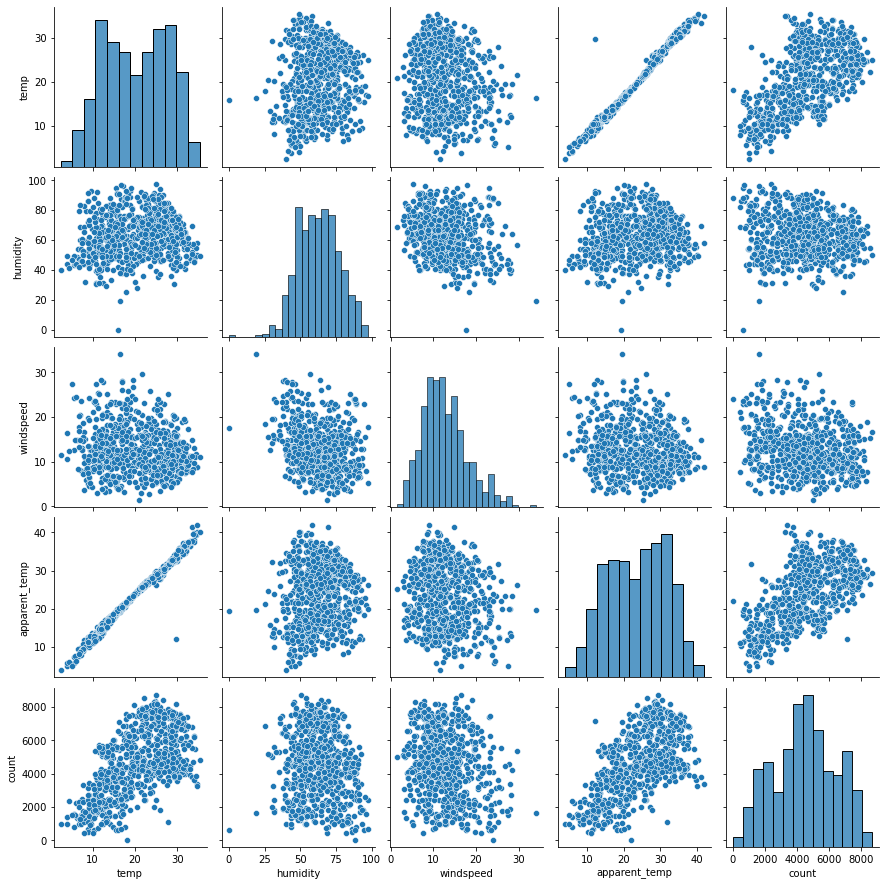

In [14]:
list_numeric = ['temp', 'humidity', 'windspeed', 'apparent_temp', 'count']
sns.pairplot(boom_bikes[list_numeric])
plt.show()

OBSERVATION:
- 'temp' and 'apparent_temp' have a very strong collinear relationship. Which of these must be dropped will be decided later during model building.
- 'count' /demand of shared bikes definitely has some sort of relationship with 'temp'/ 'apparent_temp'. Mostly, looks like linear.
- demand of shared bikes were more with higher humidity

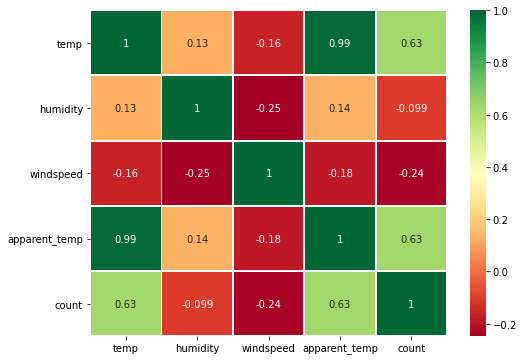

In [15]:
# Lets plot a correlation heat map for the continuous variables

plt.figure(figsize = (8,6))
ax= sns.heatmap(boom_bikes[list_numeric].corr(), annot = True, cmap="RdYlGn",linewidth =1)

Similar observation as with pair plots

#### 2. Visualising Categorical Variables

Let's make a boxplot of count for all categorical variables.

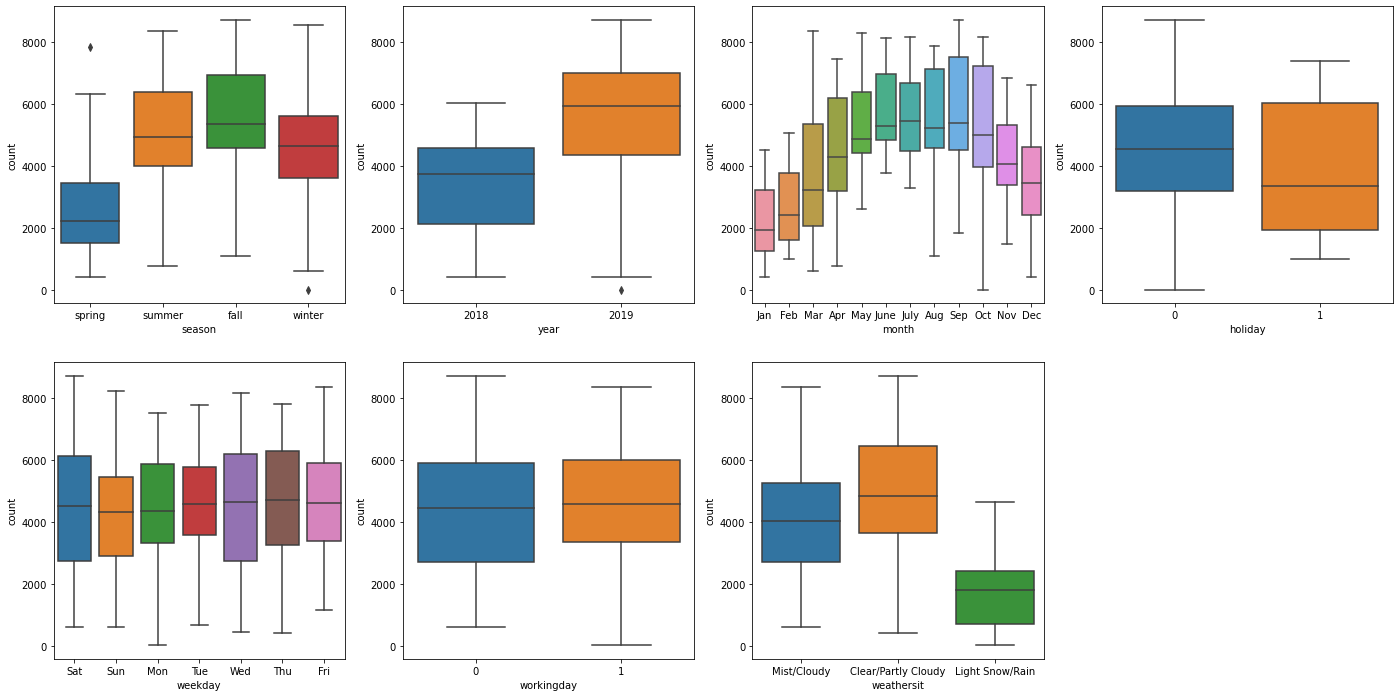

In [16]:
# plotting barplot for all categorical variables
plt.figure(figsize=(24, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = boom_bikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'count', data = boom_bikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'count', data = boom_bikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'count', data = boom_bikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'count', data = boom_bikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'count', data = boom_bikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'count', data = boom_bikes)
plt.show()

OBSERVATION:
- Demand of shared bikes is more during FALL followed by SUMMER as the bike riding conditions are favourable during these seasons.
- Demand of shared bikes is clearly more in 2019 than in 2018. This may be due to an increase in awareness with every passing year.
- Clearly, the demand of bikes is more in the months from May to October which are again FALL and SUMMER months.
- Over non-Holidays, demand is more. This may be because people might be spending more family time at home or preferring car rentals for family commutation.
- weekday/workingday hardly affects the count
- Most of the shared bikes are rented on 'Clear, Few clouds, Partly cloudy' day. 
- There is not even a single record of any bike rental on a 'Heavy Snow/Rain/Hail/Fog'day

Lets's do some more statistical detailed analysis on the above variables

In [17]:
# Creating function for analysis of each categorical variable

def stats_plots_for_categories(cat_variable):
    # Calculating percentage of booking against each respective category
    pivot_bikes_categorical = boom_bikes.pivot_table(index = [cat_variable], values =['count'], aggfunc ='sum')
    pivot_bikes_categorical['count %age'] = (pivot_bikes_categorical['count']/pivot_bikes_categorical['count'].sum())*100
    print(pivot_bikes_categorical.sort_values('count %age', ascending= False))

    pivot_bikes_categorical.plot(kind= 'bar')
    # Plotting the count based on categorical variable chosen
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(cat_variable,'count',data=boom_bikes)
    plt.subplot(1,2,2)
    sns.barplot(cat_variable,'count',data=boom_bikes, hue='year')
    plt.suptitle('Bike Rentals vs ' + cat_variable)
    plt.show()
    return

          count  count %age
season                     
fall    1061129   32.244879
summer   918589   27.913469
winter   841613   25.574374
spring   469514   14.267278


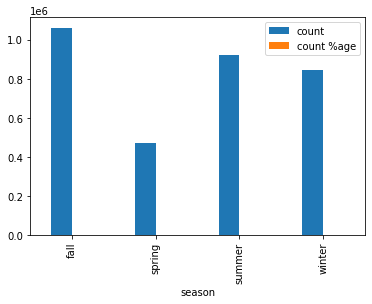

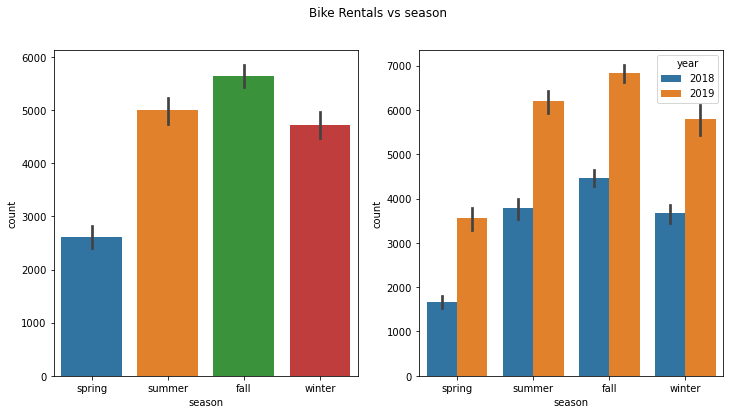

In [18]:
# season
stats_plots_for_categories('season')

OBSERVATION:
- 32% bike bookings are done during fall season followed by summer, approx 28%
- Clearly season will be a good predictor

        count  count %age
month                    
Aug    351194   10.671849
June   346342   10.524409
Sep    345991   10.513743
July   344948   10.482049
May    331686   10.079053
Oct    322352    9.795417
Apr    269094    8.177049
Nov    254831    7.743634
Mar    228920    6.956268
Dec    211036    6.412821
Feb    149518    4.543453
Jan    134933    4.100254


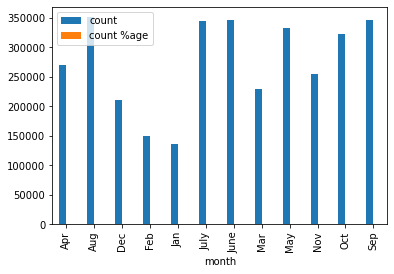

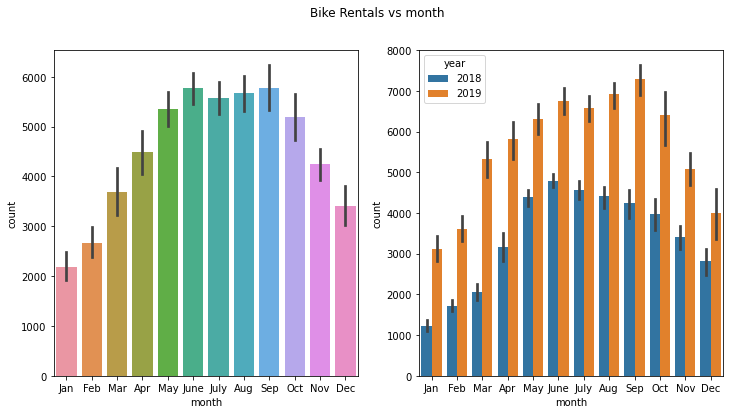

In [19]:
# month
stats_plots_for_categories('month')

OBSERVATION:
- Month could be a good indicator and hence better predictor as clearly May-October have comparatively higher number of bookings

           count  count %age
holiday                     
0        3212410    97.61657
1          78435     2.38343


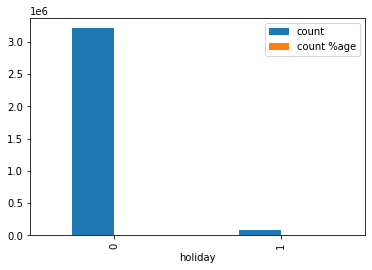

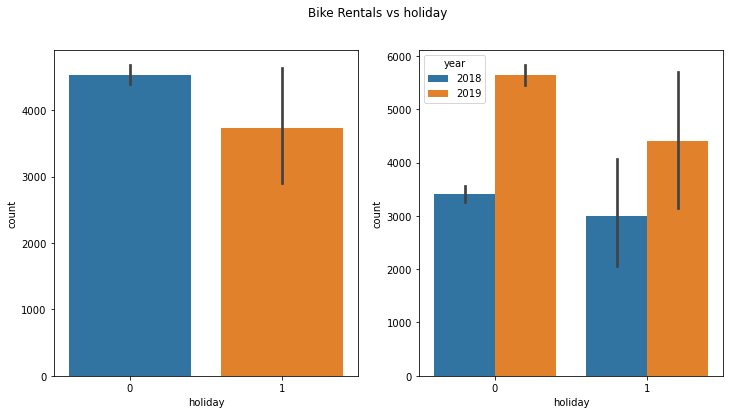

In [20]:
# holiday
stats_plots_for_categories('holiday')

OBSERVATIONS:
- Nearly, 97.6% of bike rentals are happening on a non-holiday. It could be a good predictor variable

          count  count %age
weekday                    
Fri      487790   14.822637
Thu      485395   14.749859
Sat      477807   14.519280
Wed      471214   14.318936
Tue      469109   14.254971
Mon      455503   13.841521
Sun      444027   13.492796


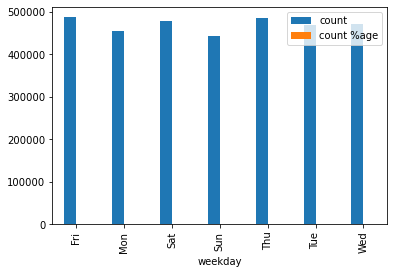

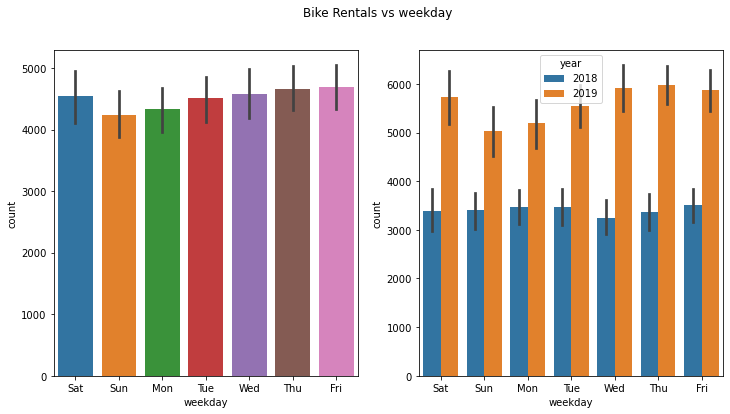

In [21]:
# weekday
stats_plots_for_categories('weekday')

OBSERVATIONS:
- Almost similar distribution, 'weekday' doesn't looks like a good predictor variable

              count  count %age
workingday                     
1           2290576   69.604494
0           1000269   30.395506


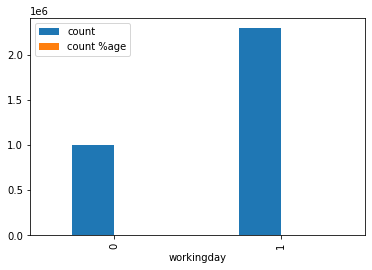

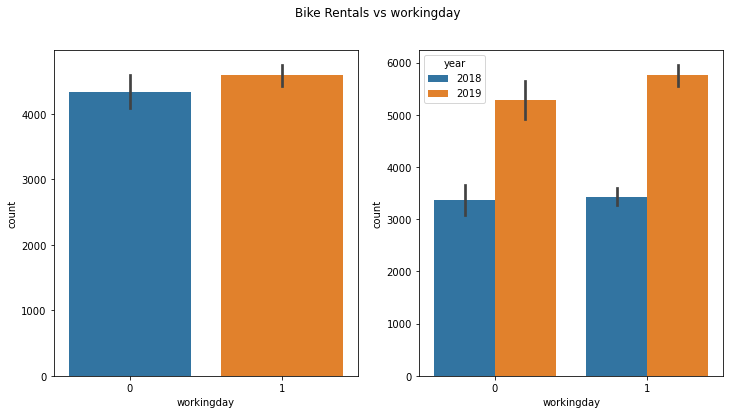

In [22]:
# workingday
stats_plots_for_categories('workingday')

OBSERVATIONS:
- Almost 69.6% of bike rentals are happening on a working day. It could be a good predictor variable

                       count  count %age
weathersit                              
Clear/Partly Cloudy  2257952   68.613137
Mist/Cloudy           995024   30.236125
Light Snow/Rain        37869    1.150738


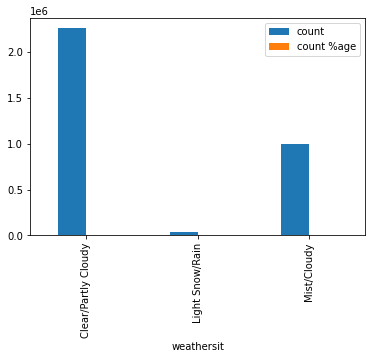

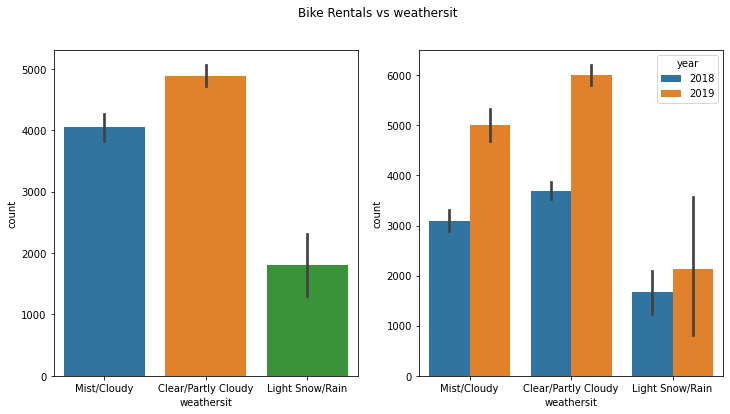

In [23]:
# weathersit
stats_plots_for_categories('weathersit')

OBSERVATIONS:
- Most of the shared bikes are rented on 'Clear, Few clouds, Partly cloudy, Partly cloudy' day, almost 68.6%
- There is not even a single record of any bike rental on a 'Heavy Snow/Rain/Hail/Fog'day
- It could be  a good predictor variable

In [24]:
boom_bikes.shape

(730, 12)

## STEP 3: Data Preparation

#### Dummy Variable creation 

In [25]:
list_categorical = ['season','month','weekday','weathersit']
boom_bikes_dummy = pd.get_dummies(data=boom_bikes,columns = list_categorical, drop_first=True)
boom_bikes_dummy.head()

,year,holiday,workingday,temp,apparent_temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
boom_bikes_dummy.shape

(730, 30)

In [27]:
boom_bikes_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        730 non-null    object 
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   apparent_temp               730 non-null    float64
 5   humidity                    730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   count                       730 non-null    int64  
 8   season_spring               730 non-null    uint8  
 9   season_summer               730 non-null    uint8  
 10  season_winter               730 non-null    uint8  
 11  month_Aug                   730 non-null    uint8  
 12  month_Dec                   730 non-null    uint8  
 13  month_Feb                   730 non

In [28]:
# All data looks good. Lets change 'year' column as well to 0 and 1 for model training

boom_bikes_dummy['year']=boom_bikes['year'].map({'2018': 0,'2019': 1})

In [29]:
boom_bikes_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   apparent_temp               730 non-null    float64
 5   humidity                    730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   count                       730 non-null    int64  
 8   season_spring               730 non-null    uint8  
 9   season_summer               730 non-null    uint8  
 10  season_winter               730 non-null    uint8  
 11  month_Aug                   730 non-null    uint8  
 12  month_Dec                   730 non-null    uint8  
 13  month_Feb                   730 non

## STEP 4: Splitting the Data into Training and Testing Sets

Since, the number of records are less, so lets do a 80:20 split

In [30]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
boom_bikes_train, boom_bikes_test = train_test_split(boom_bikes_dummy, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
# checking shape of train and test data
boom_bikes_train.shape

(510, 30)

In [32]:
boom_bikes_test.shape

(219, 30)

#### Rescaling the features using Min-Max scaling

In [33]:
scaler = MinMaxScaler()

# Apply scaler() to all nominal variable

boom_bikes_train[list_numeric] = scaler.fit_transform(boom_bikes_train[list_numeric])
boom_bikes_train.head()

,year,holiday,workingday,temp,apparent_temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [34]:
# checking after scaling is applied
boom_bikes_train.describe()

,year,holiday,workingday,temp,apparent_temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looks good. Min-Max scaling applied

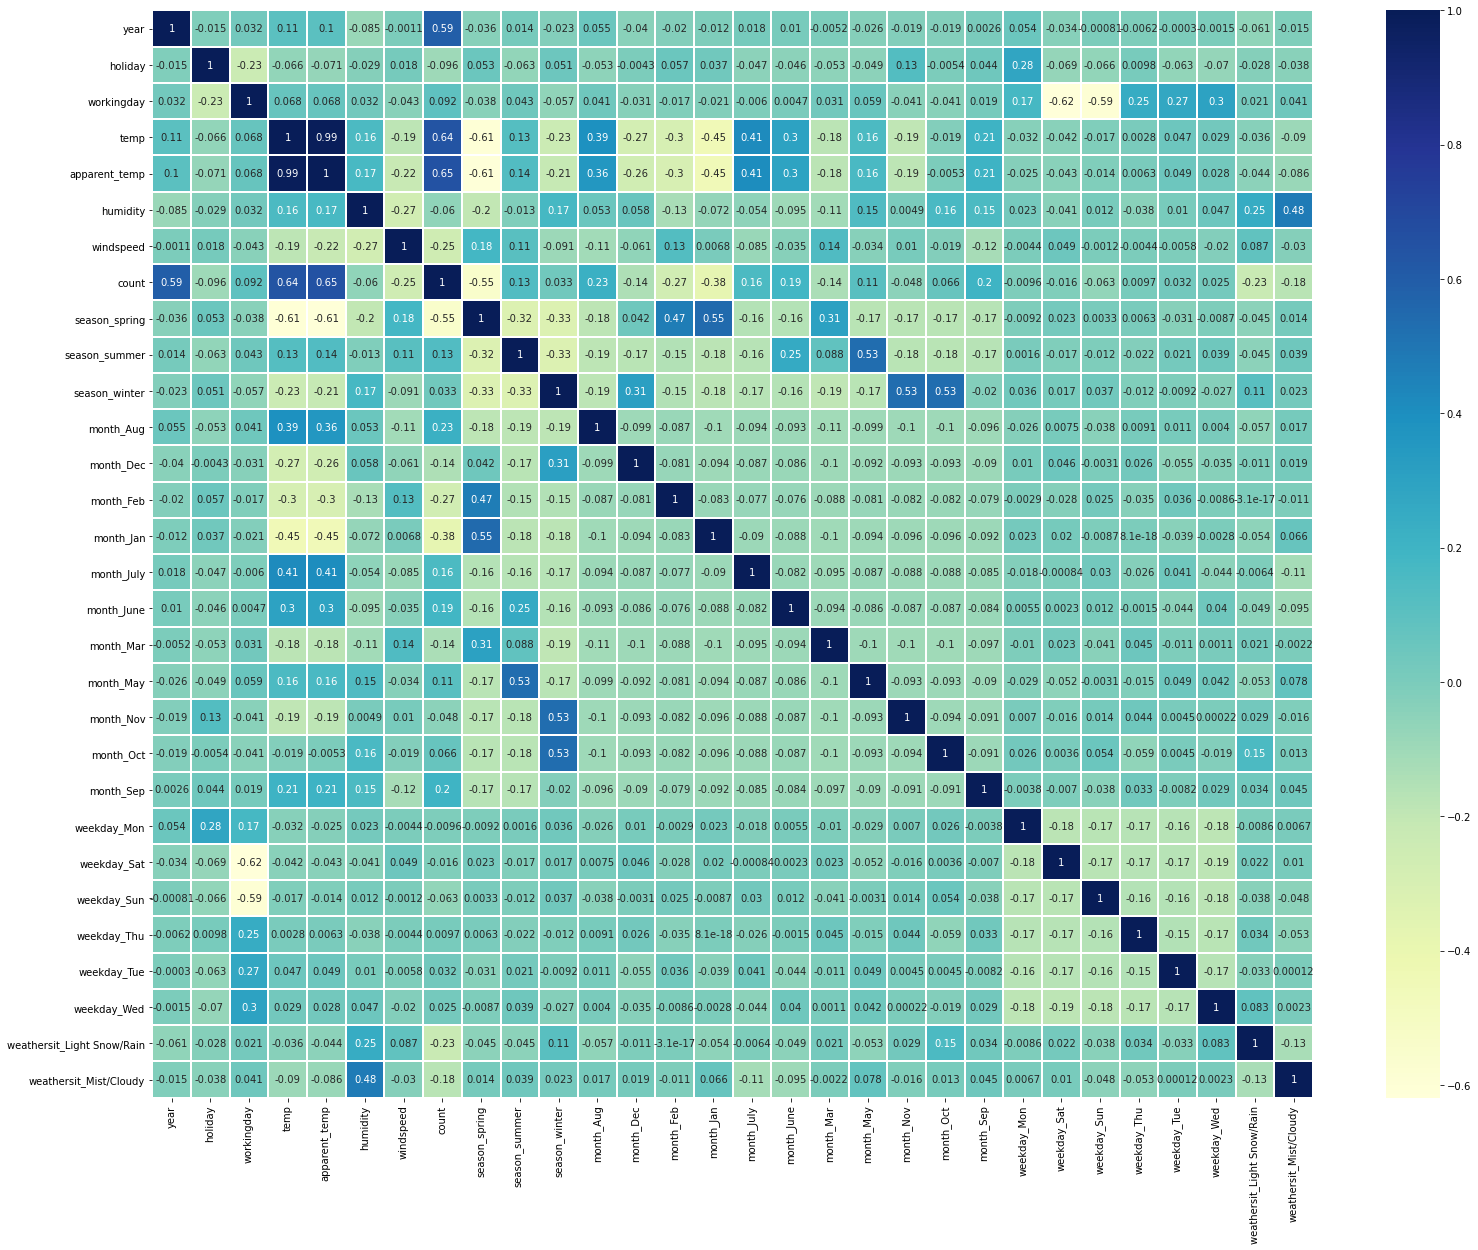

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 20))
sns.heatmap(boom_bikes_train.corr(), annot = True, cmap="YlGnBu", linewidth=1)
plt.show()

OBSERVATION:
- temp and apparent_temp are 99% correlated high correlation value of 0.99. So, we can use either of these for model prediction
- temp and year have good correlation with count 0.56 and 0.65 respectively.
- count has a negative correlation with spring season(- 0.58), windspeed(-0.26) and correspondingly the months Jan and Feb
- season and corresponding months have some correlation which is obvious 
- working day has negative correlation with Saturday and Sunday
- misty weather and humidity have 50% correlation

### Dividing into X and Y sets for the model building

In [36]:
y_train = boom_bikes_train.pop('count')
X_train = boom_bikes_train

## STEP 5: Building a Linear Model

### RFE

#### Recursive Feature Elimination using SciKitLearn

We will use a mixed approach for bringing down the predictor variables. First RFE followed by Manual selection

In [37]:
# Lets first use RFE to bring down the predictor variables to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [38]:
# Lets see the ranking of predictor vaiables after running RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('apparent_temp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_Aug', False, 7),
 ('month_Dec', False, 3),
 ('month_Feb', False, 4),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 14),
 ('month_Mar', False, 15),
 ('month_May', False, 6),
 ('month_Nov', False, 2),
 ('month_Oct', False, 11),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 8),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 13),
 ('weathersit_Light Snow/Rain', True, 1),
 ('weathersit_Mist/Cloudy', True, 1)]

In [39]:
# list of top 15 predictor variables after running RFE
predictors =  X_train.columns[rfe.support_]
predictors

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_Jan',
       'month_July', 'month_Sep', 'weekday_Sat', 'weathersit_Light Snow/Rain',
       'weathersit_Mist/Cloudy'],
      dtype='object')

In [40]:
# Lets also see the non-selected columns incase we may miss out any important for business
X_train.columns[~rfe.support_]

Index(['apparent_temp', 'month_Aug', 'month_Dec', 'month_Feb', 'month_June',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'weekday_Mon',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

OBSERVATION: 
- All looks good based on our previous conclusions during EDA

In [41]:
# Creating X_train dataframe with RFE selected predictors
X_train_rfe = X_train[predictors]

#### Model 1

In [42]:
# We will use statsmodel for detailed  statistical inferences

# Adding constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# building first fitted model
lr_1 = sm.OLS(y_train, X_train_lm1).fit()

# summary statistics of model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.31e-191
Time:                        17:30:07   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

OBSERVATION :
- Looking at the p-values, it looks like 'month_jan, and 'holiday' aren't really significant

Maybe we could drop? Lets see the VIF. 

#### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [43]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def VIF_Calculator(X_train_df):
    vif = pd.DataFrame()
    vif['Features'] = X_train_df.columns
    vif['VIF'] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [44]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF_Calculator(X_train_rfe)

,Features,VIF
4,humidity,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
14,weathersit_Mist/Cloudy,2.29
0,year,2.09
12,weekday_Sat,1.98


OBSERVATION: 
- humidity has a significantally very high VIF. Lets drop this first over month_jan and holiday

#### Model 2

In [45]:
# Dropping highly correlated variable 'humidity'
X2 = X_train_rfe.drop('humidity', 1)

# Adding constant
X_train_lm2 = sm.add_constant(X2)

# building second fitted model
lr_2 = sm.OLS(y_train, X_train_lm2).fit()

# summary statistics of model obtained
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          7.33e-189
Time:                        17:30:07   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

OBSERVATION:
- holiday has a high p-value 0.04. Looks insignificant. Lets check VIF

In [46]:
# Lets see VIF values
VIF_Calculator(X2)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,season_spring,3.08
6,season_summer,2.33
0,year,2.08
7,season_winter,1.99
11,weekday_Sat,1.97
8,month_Jan,1.62
9,month_July,1.59


OBSERVATION:
- Since, we have seen temp has a higher correlation with the count, lets not drop it even though it has higher VIF.
- Lets drop holiday with high p-value

#### Model 3

In [47]:
# Dropping insignificant variable 'holiday'
X3 = X2.drop('holiday', 1)

# Adding constant
X_train_lm3 = sm.add_constant(X3)

# building third fitted model
lr_3 = sm.OLS(y_train, X_train_lm3).fit()

# summary statistics of model obtained
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          4.11e-189
Time:                        17:30:07   Log-Likelihood:                 508.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     496   BIC:                            -930.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [48]:
# Lets see VIF values
VIF_Calculator(X3)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,season_spring,2.99
5,season_summer,2.31
0,year,2.08
6,season_winter,1.92
10,weekday_Sat,1.84
7,month_Jan,1.62
8,month_July,1.59


OBSERVATION:
- 'temp' and 'workingday' being important factors, Lets drop 'month_Jan' (high p-value) and see the effect

#### Model 4

In [49]:
# Dropping insignificant variable 'month_Jan'
X4 = X3.drop('month_Jan', 1)

# Adding constant
X_train_lm4 = sm.add_constant(X4)

# building fourth fitted model
lr_4 = sm.OLS(y_train, X_train_lm4).fit()

# summary statistics of model obtained
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.28e-189
Time:                        17:30:07   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [50]:
# Lets see VIF values
VIF_Calculator(X4)

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,season_spring,2.38
5,season_summer,2.31
0,year,2.07
6,season_winter,1.92
9,weekday_Sat,1.83
7,month_July,1.58
11,weathersit_Mist/Cloudy,1.56


OBSERVATION: 
- Rsquare and adjusted R square are close to 84%. A good sign
- Even though p-value for 'month_July' is well within range, but its higher compared to others. Lets drop this, to avoid overfitting.

#### Model 5

In [51]:
# Dropping insignificant variable 'month_July'
X5 = X4.drop('month_July', 1)

# Adding constant
X_train_lm5 = sm.add_constant(X5)

# building fifth fitted model
lr_5 = sm.OLS(y_train, X_train_lm5).fit()

# summary statistics of model obtained
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          6.86e-189
Time:                        17:30:07   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [52]:
# Lets see VIF values
VIF_Calculator(X5)

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
4,season_spring,2.30
0,year,2.07
5,season_summer,1.99
8,weekday_Sat,1.83
6,season_winter,1.77
10,weathersit_Mist/Cloudy,1.56
7,month_Sep,1.23


OBSERVATION:
- The model looks good but since 'temp' has VIF more than 5, lets drop 'season_spring' as it has higher p-value compare to others

#### Model 6

In [53]:
# Dropping insignificant variable 'season_spring'
X6 = X5.drop('season_spring', 1)

# Adding constant
X_train_lm6 = sm.add_constant(X6)

# building sixth fitted model
lr_6 = sm.OLS(y_train, X_train_lm6).fit()

# summary statistics of model obtained
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.47e-188
Time:                        17:30:07   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [54]:
# Lets see VIF values
VIF_Calculator(X6)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,year,2.02
7,weekday_Sat,1.69
4,season_summer,1.57
9,weathersit_Mist/Cloudy,1.53
5,season_winter,1.40
6,month_Sep,1.20
8,weathersit_Light Snow/Rain,1.08


OBSERVATION:
- All  p-values are zero, well within acceptable range.
- 'temp' has a little high VIF but still less than 5 
- Prob (F-statistic) is ~ 0.0000. Model is a good fit
- R-squared and adjusted R-squared are nearly 83% which means 83% of the variance of 'count' is explained by the model

Since 'temp' and 'workingday' have an effect on the 'count', Let's see what effect happens on the model after dropping 'temp' for our next model

#### Model 7

In [55]:
# Dropping variable 'temp'
X7 = X6.drop('temp', 1)

# Adding constant
X_train_lm7 = sm.add_constant(X7)

# building seventh fitted model
lr_7 = sm.OLS(y_train, X_train_lm7).fit()

# summary statistics of model obtained
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     76.68
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           2.30e-88
Time:                        17:30:08   Log-Likelihood:                 259.65
No. Observations:                 510   AIC:                            -499.3
Df Residuals:                     500   BIC:                            -456.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [56]:
# Lets see VIF values
VIF_Calculator(X7)

,Features,VIF
2,windspeed,3.25
1,workingday,3.14
0,year,1.88
8,weathersit_Mist/Cloudy,1.53
6,weekday_Sat,1.52
3,season_summer,1.50
4,season_winter,1.40
5,month_Sep,1.11
7,weathersit_Light Snow/Rain,1.08


OBSERVATION:
- Rsquared and adj. R squared have fallen tremendously to nearly 58%
- p(F-statistic) is more than the previous model.

**The previous model was better and so, lets continue with Model 6 as our final Model for our analysis further. The model has all the p-values and VIFs in acceptable range. The p(F-statistic value) is also close to zero showing that the model 6 is a good fit overall.**

### Linearity Assumption check

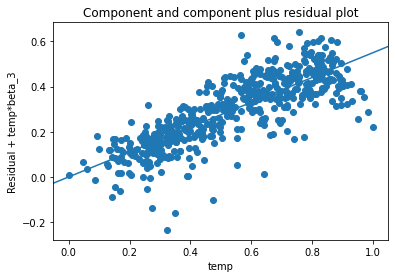

In [57]:
# Lets see that the Linearity assumption is preserved between count and temp.
sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

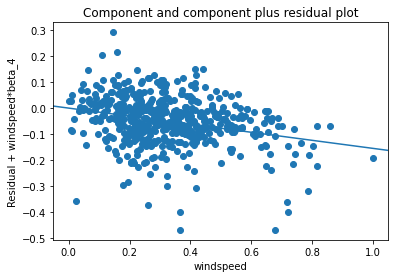

In [58]:
# Lets see that the Linearity assumption is preserved between count and windspeed.
sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

**Linearity is well-preserved**

### Multicolinearity check

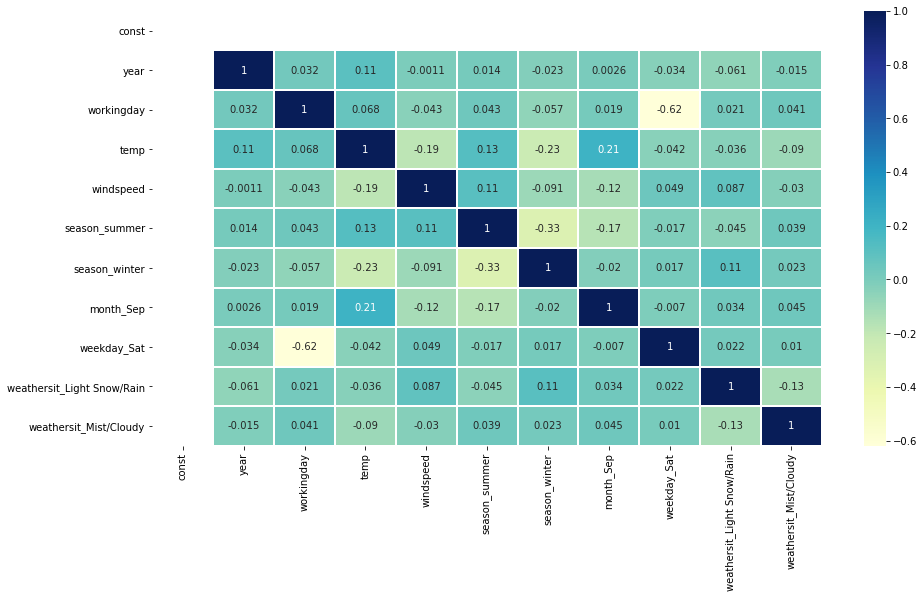

In [59]:
# Plotting heat map to check multicollinearity between predictor variables
plt.figure(figsize=(15,8))
sns.heatmap(X_train_lm6.corr(),annot = True, cmap="YlGnBu",linewidth =1)
plt.show()

**Little or no multicollinearity observed. Also, all variables have a VIF less than 5**

## STEP 6: Residual Analysis of the Training data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

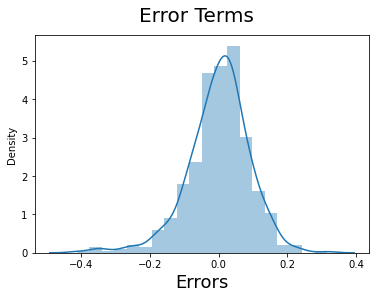

In [60]:
# y predicted
y_train_pred = lr_6.predict(X_train_lm6)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

**Error terms are normally distributed and centred around mean 0**

### Test for Homoscedasticity

An assumption of linear regression is homoscedasticity. Homoscedasticity in a model means that the error is constant along the values of the dependent variable.

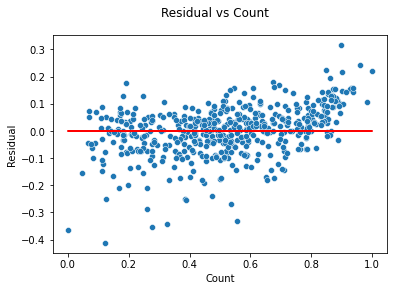

In [61]:
# plotting residual vs count scatter plot
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.suptitle('Residual vs Count')
plt.show()

**OBSERVATION:**
- **constant deviation of the points from the zero-line**
- **no discernible pattern, hence Homoscedasticity is well preserved**


### Durbin-Watson Test for Indepencence of Residuals

Durbin-Watson test is for checking the degree of correlation of each residual error with the ‘previous’ residual error. 
The Durbin Watson test reports a test statistic, with a value from 0 to 4; where if the value is close to 2, the less auto-correlation there is between the various variables.

In [62]:
print('Durbin-Watson value for the Final Model is',round(sm.stats.stattools.durbin_watson(residual),4))

Durbin-Watson value for the Final Model is 2.08


## STEP 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [63]:
boom_bikes_test[list_numeric] = scaler.transform(boom_bikes_test[list_numeric])

boom_bikes_test.head()

,year,holiday,workingday,temp,apparent_temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [64]:
# checking the data
boom_bikes_test.describe()

,year,holiday,workingday,temp,apparent_temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
# Dividing into X_test and y_test dataframes
y_test = boom_bikes_test.pop('count')
X_test = boom_bikes_test

# Adding constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)

# Dropping variables from X_test_m6
X_test_m6 = X_test_m6[X_train_lm6.columns]

# Making predictions using the seventh model
y_pred_m6 = lr_6.predict(X_test_m6)

## STEP 8: Model Evaluation

### Lets check R-squared and Adjusted R-squared for Test Data

In [66]:
# R-square for test
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred_m6)
print(r2)

# n is number of rows in test dataset
n = X_test_m6.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_m6.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
print(adjusted_r2)

0.7955844377237249
0.7847


**Let's now plot the graph for actual versus predicted values.**

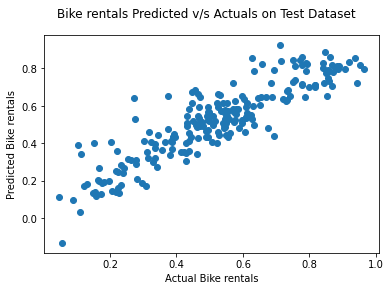

In [67]:
# Plotting y_test and y_pred_m6 to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m6)
fig.suptitle('Bike rentals Predicted v/s Actuals on Test Dataset')        # Plot heading 
plt.xlabel('Actual Bike rentals')                                         # X-label
plt.ylabel('Predicted Bike rentals')  
plt.show()

**OBSERVATION:**
- **The actual v/s predicted values are quite close**

We can see that the equation of our best fitted line is:

$ count = 0.5499  \times  temp + 0.2331  \times  year + 0.1318  \times  season\_winter + 0.0972  \times  month\_Sep + 0.0874  \times  season\_summer + 0.0677  \times  weekday\_Sat + 0.0563  \times  workingday - 0.2880  \times  weathersit\_Light Snow/Rain - 0.1552  \times  windspeed - 0.0813  \times  weathersit\_Mist/Cloudy + 0.0753 $

## FINAL METRICS COMPARISON

- Training R-squared : 0.836
- Training Adjusted R-squared : 0.832
- Test R-squared: 0.796
- Test Adjusted R-squared: 0.785
- Difference in R-squared between Training and Test dataset: 4%
- Difference in adjusted R-squared between Training and test:4.7% (<5%)

## MODEL SUMMARY

. The top 3 features contributing significantly towards explaining the demand of shared bikes are-
 - **temp** with the coefficient of 0.5499
 - **weathersit_Light Snow/Rain** (weathersit = 3) with the coefficient of -0.2880
 - **year (yr)** with a coefficient of 0.2331

#### Interpretation and Suggestions-

 - Demand is more during Summer months(higher temperature) and clear weather conditions. So, we can do more promotions during this period.
 - The demand has significantly increased in the year 2019 as compared to 2018 as people must have become more aware towards conserving environment and shared bikes rentals is one of the ways to conserve it.
 - During spring, and light snow/rain/misty weather conditions the demand goes down as we can see that there is a negative correlation with these variables. Business can provide some offers and discounts during this time to increase the demand.